In [31]:
 #Analyzing User Sentiments and Performance of Threads: An Instagram App Reviews Study

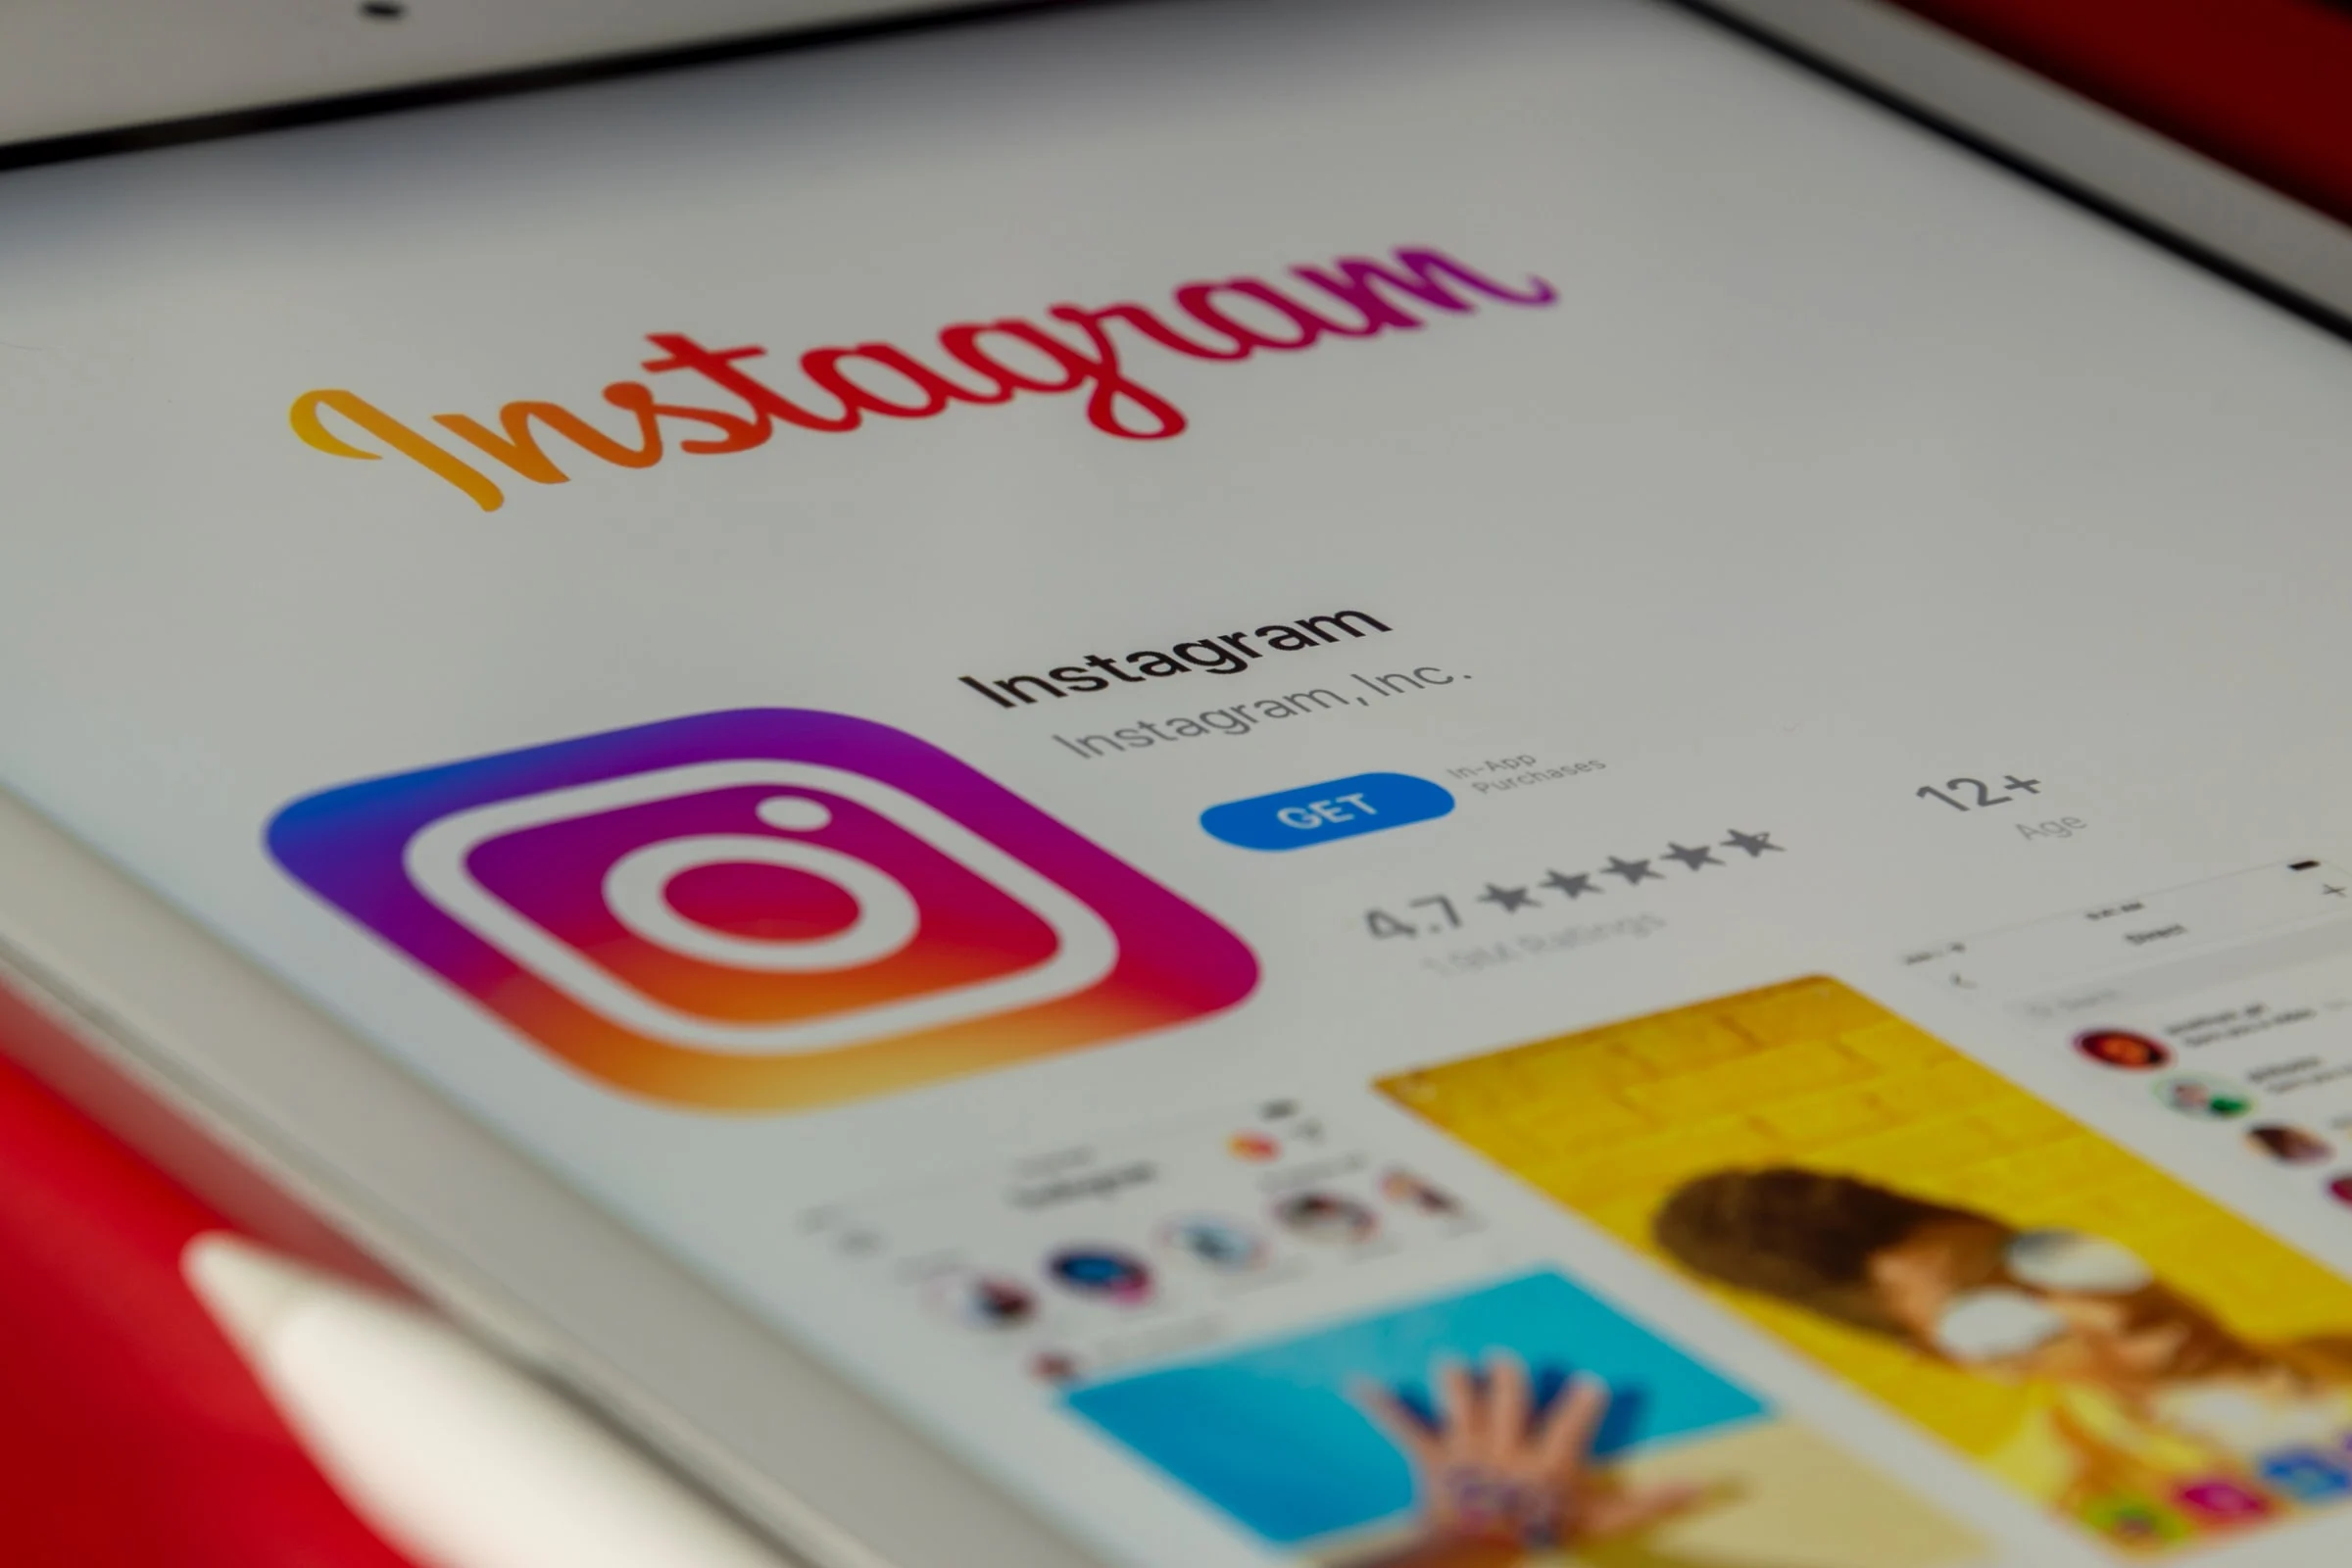

In [32]:
from PIL import Image
img = Image.open('/content/Instagram-1.webp')
img

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("threads_reviews.csv")

In [36]:
df.head()

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43

In [37]:
df.tail()

source                                 review_description  rating  \
32905  App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906  App Store              Add Search and hashtag like Twitter !       1   
32907  App Store                                        bad twister       1   
32908  App Store                       Yet another trash from Meta.       1   
32909  App Store  Nothing special this app is just a copy of twi...       1   

               review_date  
32905  2023-07-06 01:23:55  
32906  2023-07-19 08:01:06  
32907  2023-07-17 06:39:13  
32908  2023-07-07 17:47:16  
32909  2023-07-07 07:01:43

In [38]:
df.shape

(32910, 4)

In [39]:
df.columns

Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')

In [40]:
df.duplicated().sum()

1

In [41]:
df = df.drop_duplicates()

In [42]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32909 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32909 non-null  object
 1   review_description  32909 non-null  object
 2   rating              32909 non-null  int64 
 3   review_date         32909 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [44]:
df.describe()

rating
count  32909.000000
mean       3.398432
std        1.751484
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000

In [45]:
df.nunique()

source                    2
review_description    26706
rating                    5
review_date           31667
dtype: int64

In [46]:
df['source'].unique()

array(['Google Play', 'App Store'], dtype=object)

In [47]:
df['source'].value_counts()

Google Play    30270
App Store       2639
Name: source, dtype: int64

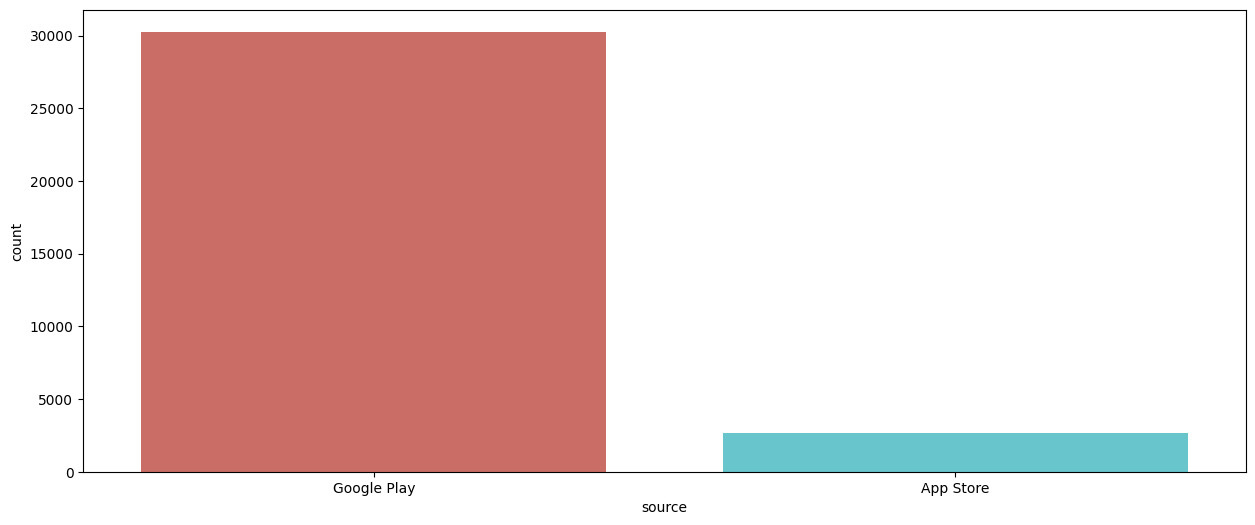

In [49]:
plt.figure(figsize=(15, 6))
sns.countplot(x='source', data=df, palette='hls')
plt.show()


In [50]:
fig = go.Figure(data=[go.Bar(x=df['source'].value_counts().index, y=df['source'].value_counts())])
fig.update_layout(title='Source of Reviews',xaxis_title="Source",yaxis_title="Count")
fig.show()


In [51]:
counts = df['source'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Source of Reviews')
fig.show()

In [52]:
df['rating'].unique()

array([2, 3, 1, 5, 4])

In [53]:
df['rating'].value_counts()

5    15558
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64

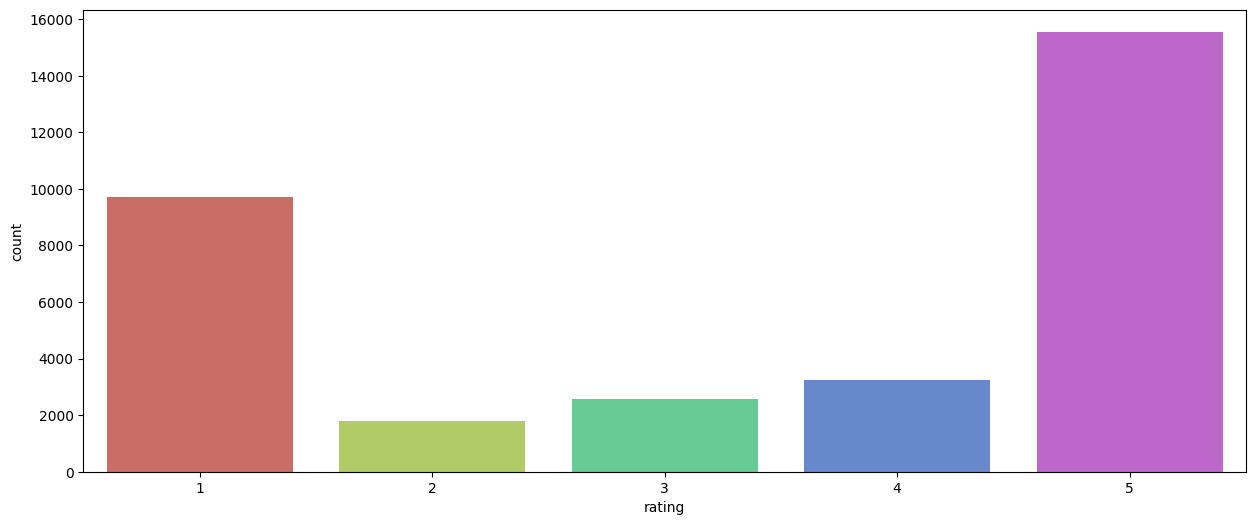

In [55]:
plt.figure(figsize=(15, 6))
sns.countplot(x='rating', data=df, palette='hls')
plt.show()


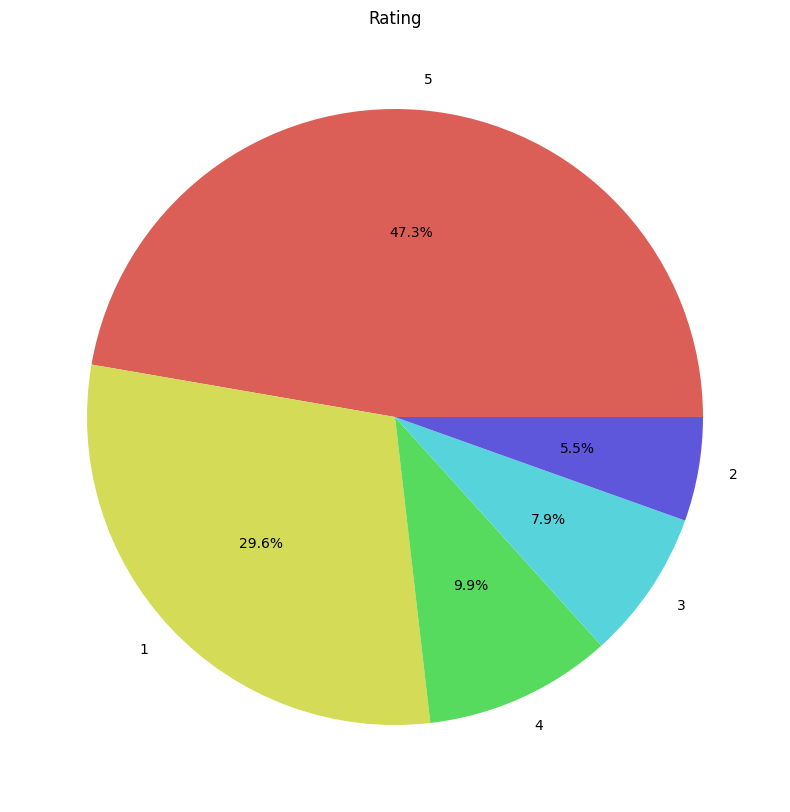

In [56]:
plt.figure(figsize=(10, 10))
counts = df['rating'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Rating')
plt.show()

In [57]:
fig = go.Figure(data=[go.Bar(x=df['rating'].value_counts().index, y=df['rating'].value_counts())])
fig.update_layout(title='Rating',xaxis_title="Rating",yaxis_title="Count")
fig.show()

In [58]:
counts = df['rating'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Rating')
fig.show()

In [59]:
#thread analysis
df['review_date'] = pd.to_datetime(df['review_date'])

In [60]:
df['review_date']

0       2023-07-08 14:18:24
1       2023-07-19 20:52:48
2       2023-07-06 23:03:11
3       2023-07-10 00:53:25
4       2023-07-06 16:57:43
                ...        
32905   2023-07-06 01:23:55
32906   2023-07-19 08:01:06
32907   2023-07-17 06:39:13
32908   2023-07-07 17:47:16
32909   2023-07-07 07:01:43
Name: review_date, Length: 32909, dtype: datetime64[ns]

In [61]:
df1 = df.copy()

In [62]:
#thread analysis
df1.set_index('review_date', inplace=True)

In [63]:
start_date = df1.index.min()
end_date = df1.index.max()

In [64]:
print("Start Date of Reviews:", start_date)
print("End Date of Reviews:", end_date)

Start Date of Reviews: 2023-07-05 22:53:12
End Date of Reviews: 2023-07-25 09:42:20


In [65]:
week_delta = pd.Timedelta(days=6)
current_date = start_date

In [66]:
while current_date <= end_date:
    start_week = current_date
    print("State_Week:\n",start_week)
    end_week = current_date + week_delta
    print("End_Week:\n",end_week)
    current_week_data = df1[(df1.index >= start_week) & (df1.index < end_week)]
    print("Current_week:\n",current_week_data)
    weekly_counts = current_week_data.resample('D').size()
    print("Weekly_Counts:\n",weekly_counts)
    fig = px.bar(weekly_counts, x=weekly_counts.index, y=weekly_counts.values,
                 labels={'x': 'Date', 'y': 'Number of Reviews'},
                 title=f'Reviews for Week {start_week.strftime("%Y-%m-%d")} to {end_week.strftime("%Y-%m-%d")}')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    current_date += week_delta

State_Week:
 2023-07-05 22:53:12
End_Week:
 2023-07-11 22:53:12
Current_week:
                           source  \
review_date                        
2023-07-08 14:18:24  Google Play   
2023-07-06 23:03:11  Google Play   
2023-07-10 00:53:25  Google Play   
2023-07-06 16:57:43  Google Play   
2023-07-06 14:35:15  Google Play   
...                          ...   
2023-07-07 11:59:07    App Store   
2023-07-06 21:51:55    App Store   
2023-07-06 01:23:55    App Store   
2023-07-07 17:47:16    App Store   
2023-07-07 07:01:43    App Store   

                                                    review_description  rating  
review_date                                                                     
2023-07-08 14:18:24  Meh. Not the greatest experience on a Chromebo...       2  
2023-07-06 23:03:11  For a brand new app, it's very well optimized....       3  
2023-07-10 00:53:25  Great app with a lot of potential! However, th...       3  
2023-07-06 16:57:43  The app is good, but it ne

State_Week:
 2023-07-11 22:53:12
End_Week:
 2023-07-17 22:53:12
Current_week:
                           source  \
review_date                        
2023-07-14 16:15:10  Google Play   
2023-07-14 00:12:32  Google Play   
2023-07-14 12:46:21  Google Play   
2023-07-15 18:37:18  Google Play   
2023-07-13 16:23:06  Google Play   
...                          ...   
2023-07-17 01:36:58    App Store   
2023-07-12 13:06:47    App Store   
2023-07-17 01:34:50    App Store   
2023-07-13 21:16:40    App Store   
2023-07-17 06:39:13    App Store   

                                                    review_description  rating  
review_date                                                                     
2023-07-14 16:15:10  Pointless in following anyone. The feed algo w...       1  
2023-07-14 00:12:32  It needs a lot of work. It constantly crashes,...       2  
2023-07-14 12:46:21  It's great, but there's a lot of QoL that can ...       3  
2023-07-15 18:37:18  It suddenly closes. I thou

State_Week:
 2023-07-17 22:53:12
End_Week:
 2023-07-23 22:53:12
Current_week:
                           source  \
review_date                        
2023-07-19 20:52:48  Google Play   
2023-07-18 22:30:10  Google Play   
2023-07-19 19:35:31  Google Play   
2023-07-20 20:22:06  Google Play   
2023-07-22 20:20:32  Google Play   
...                          ...   
2023-07-19 02:47:03    App Store   
2023-07-20 04:46:29    App Store   
2023-07-18 10:22:35    App Store   
2023-07-18 17:47:46    App Store   
2023-07-19 08:01:06    App Store   

                                                    review_description  rating  
review_date                                                                     
2023-07-19 20:52:48  Pretty good for a first launch!! Its easy to u...       3  
2023-07-18 22:30:10  Currently, it's very challenging to use. It's ...       2  
2023-07-19 19:35:31  I still don’t want to see content from people ...       1  
2023-07-20 20:22:06  The application doesn't wo

State_Week:
 2023-07-23 22:53:12
End_Week:
 2023-07-29 22:53:12
Current_week:
                           source  \
review_date                        
2023-07-24 09:31:18  Google Play   
2023-07-24 12:55:56  Google Play   
2023-07-24 11:14:06  Google Play   
2023-07-23 23:36:09  Google Play   
2023-07-23 23:54:14  Google Play   
...                          ...   
2023-07-24 05:03:14    App Store   
2023-07-24 08:21:21    App Store   
2023-07-24 15:22:19    App Store   
2023-07-24 04:36:19    App Store   
2023-07-24 19:53:31    App Store   

                                                    review_description  rating  
review_date                                                                     
2023-07-24 09:31:18  Bugs still not fixed and it has been a while n...       1  
2023-07-24 12:55:56  It's look like duplicate of Twitter applicatio...       2  
2023-07-24 11:14:06  So far, so good. It's still in the early stage...       5  
2023-07-23 23:36:09  I am happy with the app so

In [67]:
daily_counts = df1.resample('D').size()
daily_counts

review_date
2023-07-05      362
2023-07-06    11429
2023-07-07     7144
2023-07-08     3591
2023-07-09     2152
2023-07-10     1393
2023-07-11     1090
2023-07-12      859
2023-07-13      734
2023-07-14      592
2023-07-15      498
2023-07-16      404
2023-07-17      290
2023-07-18      354
2023-07-19      343
2023-07-20      240
2023-07-21      256
2023-07-22      341
2023-07-23      345
2023-07-24      379
2023-07-25      113
Freq: D, dtype: int64

In [68]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily_counts.index, y=daily_counts.values,
                     marker_color='green'))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [69]:
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='lines', name=source_name))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [70]:
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='markers', name=source_name))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [71]:
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='lines+markers', name=source_name))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [72]:
fig = go.Figure()
for rating_val, rating_data in df1.groupby('rating'):
    fig.add_trace(go.Scatter(x=rating_data.resample('D').size().index, y=rating_data.resample('D').size().values,
                             mode='lines', name=f'Rating {rating_val}'))
fig.update_layout(title='Number of Reviews Day-wise by Rating',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [73]:
fig = go.Figure()
for rating_val, rating_data in df1.groupby('rating'):
    fig.add_trace(go.Scatter(x=rating_data.resample('D').size().index, y=rating_data.resample('D').size().values,
                             mode='markers', name=f'Rating {rating_val}'))
fig.update_layout(title='Number of Reviews Day-wise by Rating',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [74]:
fig = go.Figure()
for rating_val, rating_data in df1.groupby('rating'):
    fig.add_trace(go.Scatter(x=rating_data.resample('D').size().index, y=rating_data.resample('D').size().values,
                             mode='lines+markers', name=f'Rating {rating_val}'))
fig.update_layout(title='Number of Reviews Day-wise by Rating',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [75]:
df['rating']=df['rating'].map({1:-1,2:-1,3:0,4:1,5:1})

In [77]:
df

source                                 review_description  rating  \
0      Google Play  Meh. Not the greatest experience on a Chromebo...      -1   
1      Google Play  Pretty good for a first launch!! Its easy to u...       0   
2      Google Play  For a brand new app, it's very well optimized....       0   
3      Google Play  Great app with a lot of potential! However, th...       0   
4      Google Play  The app is good, but it needs a lot of functio...       0   
...            ...                                                ...     ...   
32905    App Store  This killed my dog. Mark zuckerburg strangled ...      -1   
32906    App Store              Add Search and hashtag like Twitter !      -1   
32907    App Store                                        bad twister      -1   
32908    App Store                       Yet another trash from Meta.      -1   
32909    App Store  Nothing special this app is just a copy of twi...      -1   

              review_date  
0     2023-07-08 14:18:24  
1     2023-07-19 20:52:48  
2     2023-07-06 23:03:11  
3     2023-07-10 00:53:25  
4     2023-07-06 16:57:43  
...                   ...  
32905 2023-07-06 01:23:55  
32906 2023-07-19 08:01:06  
32907 2023-07-17 06:39:13  
32908 2023-07-07 17:47:16  
32909 2023-07-07 07:01:43  

[32909 rows x 4 columns]

In [78]:
df_new = df[['review_description', 'rating']]

In [79]:
df_new

review_description  rating
0      Meh. Not the greatest experience on a Chromebo...      -1
1      Pretty good for a first launch!! Its easy to u...       0
2      For a brand new app, it's very well optimized....       0
3      Great app with a lot of potential! However, th...       0
4      The app is good, but it needs a lot of functio...       0
...                                                  ...     ...
32905  This killed my dog. Mark zuckerburg strangled ...      -1
32906              Add Search and hashtag like Twitter !      -1
32907                                        bad twister      -1
32908                       Yet another trash from Meta.      -1
32909  Nothing special this app is just a copy of twi...      -1

[32909 rows x 2 columns]

In [80]:
df_new['rating'].unique()

array([-1,  0,  1])

In [81]:
df_new['rating'].value_counts()

 1    18802
-1    11522
 0     2585
Name: rating, dtype: int64

In [82]:
fig = go.Figure(data=[go.Bar(x=df_new['rating'].value_counts().index, y=df_new['rating'].value_counts())])
fig.update_layout(title='Rating',xaxis_title="Rating",yaxis_title="Count")
fig.show()

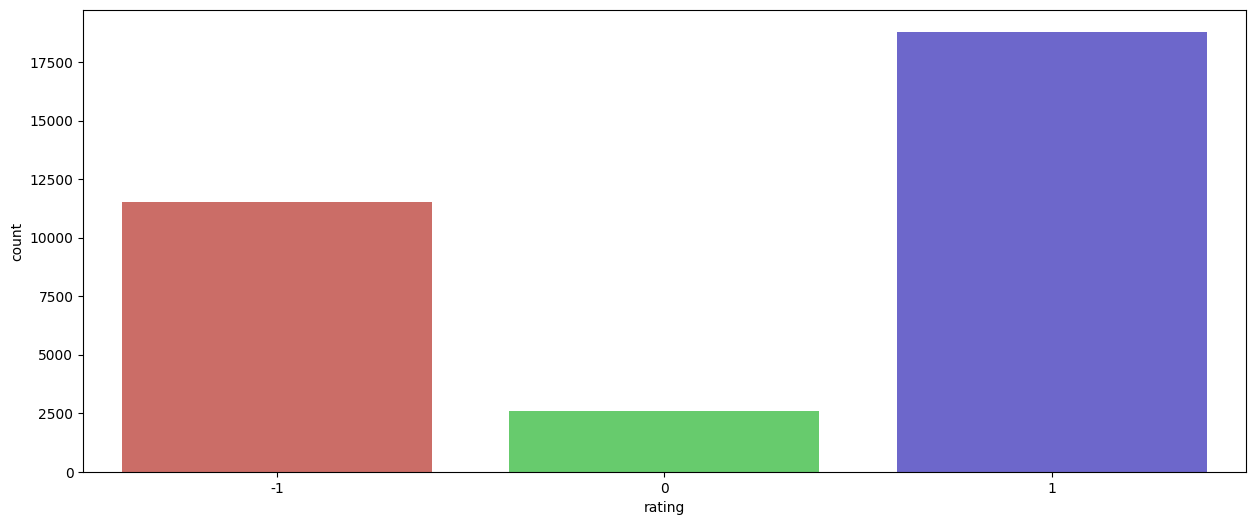

In [84]:
plt.figure(figsize=(15,6))
sns.countplot(x='rating', data = df_new, palette = 'hls')
plt.show()

In [85]:
counts = df_new['rating'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Rating')
fig.show()

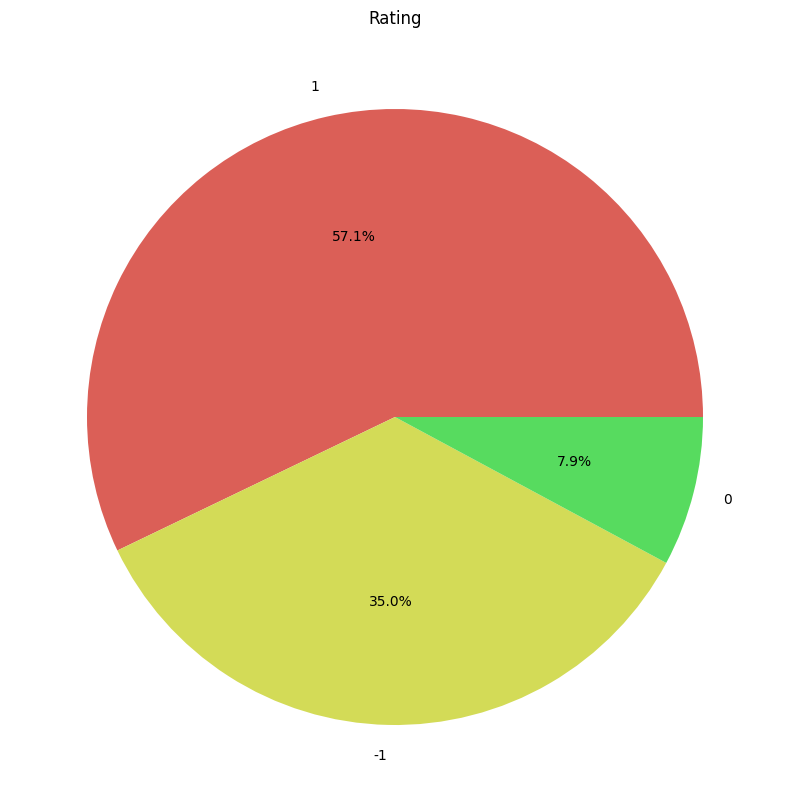

In [86]:
plt.figure(figsize=(10, 10))
counts = df_new['rating'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Rating')
plt.show()

In [87]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [88]:
df_new.review_description = df_new.review_description.apply(lambda x: clean_text(x))

In [89]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [91]:
df_new.review_description = df_new.review_description.apply(lambda x:remove_punctuation(x))

In [92]:
print(df_new.review_description)

0        meh not the greatest experience on a chromeboo...
1        pretty good for a first launch its easy to use...
2        for a brand new app its very well optimized ho...
3        great app with a lot of potential however ther...
4        the app is good but it needs a lot of function...
                               ...                        
32905    this killed my dog mark zuckerburg strangled h...
32906                 add search and hashtag like twitter 
32907                                          bad twister
32908                          yet another trash from meta
32909    nothing special this app is just a copy of twi...
Name: review_description, Length: 32909, dtype: object


In [93]:
df_new.review_description = df_new.review_description.apply(lambda x: x.lower())

In [94]:
import re

In [95]:
#W+ is non alphanumeric
#w+ is aplha numeric
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

In [96]:
df_new.review_description = df_new.review_description.apply(lambda x: tokenization(x))

In [97]:
print(df_new.review_description)

0        [meh, not, the, greatest, experience, on, a, c...
1        [pretty, good, for, a, first, launch, its, eas...
2        [for, a, brand, new, app, its, very, well, opt...
3        [great, app, with, a, lot, of, potential, howe...
4        [the, app, is, good, but, it, needs, a, lot, o...
                               ...                        
32905    [this, killed, my, dog, mark, zuckerburg, stra...
32906         [add, search, and, hashtag, like, twitter, ]
32907                                       [bad, twister]
32908                    [yet, another, trash, from, meta]
32909    [nothing, special, this, app, is, just, a, cop...
Name: review_description, Length: 32909, dtype: object


In [98]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
#stopwords[0:10]
#['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [99]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [100]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [101]:
df_new.review_description = df_new.review_description.apply(lambda x:remove_stopwords(x))

In [102]:
print(df_new.review_description )

0        meh greatest experience chromebook seems custo...
1        pretty good first launch easy use selfexplanat...
2        brand new app well optimized however missing q...
3        great app lot potential however lot needs fixe...
4        app good needs lot functionality example searc...
                               ...                        
32905        killed dog mark zuckerburg strangled dog gone
32906                     add search hashtag like twitter 
32907                                          bad twister
32908                               yet another trash meta
32909                     nothing special app copy twitter
Name: review_description, Length: 32909, dtype: object


In [103]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip()

In [104]:
df_new.review_description = df_new.review_description.apply(lambda x: clean_text(x))

In [105]:
df_new.review_description

0        meh greatest experience chromebook seems custo...
1        pretty good first launch easy use selfexplanat...
2        brand new app well optimized however missing q...
3        great app lot potential however lot needs fixe...
4        app good needs lot functionality example searc...
                               ...                        
32905        killed dog mark zuckerburg strangled dog gone
32906                      add search hashtag like twitter
32907                                          bad twister
32908                               yet another trash meta
32909                     nothing special app copy twitter
Name: review_description, Length: 32909, dtype: object

In [106]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [107]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [108]:
df_new.review_description =  df_new.review_description.apply(lambda x: lemmatizer(x))

In [109]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [110]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_urls(x))

In [111]:
df_new.review_description

0        meh great experience chromebook customize phon...
1        pretty good launch easy use selfexplanatory d ...
2        brand new app optimize miss feature app like t...
3        great app lot potential lot need fix example o...
4        app good need lot functionality example search...
                               ...                        
32905             kill dog mark zuckerburg strangle dog go
32906                      add search hashtag like twitter
32907                                          bad twister
32908                                           trash meta
32909                             special app copy twitter
Name: review_description, Length: 32909, dtype: object

In [112]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [113]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_digits(x))

In [114]:
df_new.review_description

0        meh great experience chromebook customize phon...
1        pretty good launch easy use selfexplanatory d ...
2        brand new app optimize miss feature app like t...
3        great app lot potential lot need fix example o...
4        app good need lot functionality example search...
                               ...                        
32905             kill dog mark zuckerburg strangle dog go
32906                      add search hashtag like twitter
32907                                          bad twister
32908                                           trash meta
32909                             special app copy twitter
Name: review_description, Length: 32909, dtype: object

In [115]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()])
    return(clean_text)

In [116]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_digits1(x))

In [117]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [118]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_emojis(x))

In [119]:
df_new.review_description

0        meh great experience chromebook customize phon...
1        pretty good launch easy use selfexplanatory d ...
2        brand new app optimize miss feature app like t...
3        great app lot potential lot need fix example o...
4        app good need lot functionality example search...
                               ...                        
32905             kill dog mark zuckerburg strangle dog go
32906                      add search hashtag like twitter
32907                                          bad twister
32908                                           trash meta
32909                             special app copy twitter
Name: review_description, Length: 32909, dtype: object

In [120]:
df_new

review_description  rating
0      meh great experience chromebook customize phon...      -1
1      pretty good launch easy use selfexplanatory d ...       0
2      brand new app optimize miss feature app like t...       0
3      great app lot potential lot need fix example o...       0
4      app good need lot functionality example search...       0
...                                                  ...     ...
32905           kill dog mark zuckerburg strangle dog go      -1
32906                    add search hashtag like twitter      -1
32907                                        bad twister      -1
32908                                         trash meta      -1
32909                           special app copy twitter      -1

[32909 rows x 2 columns]

In [121]:
import wordcloud

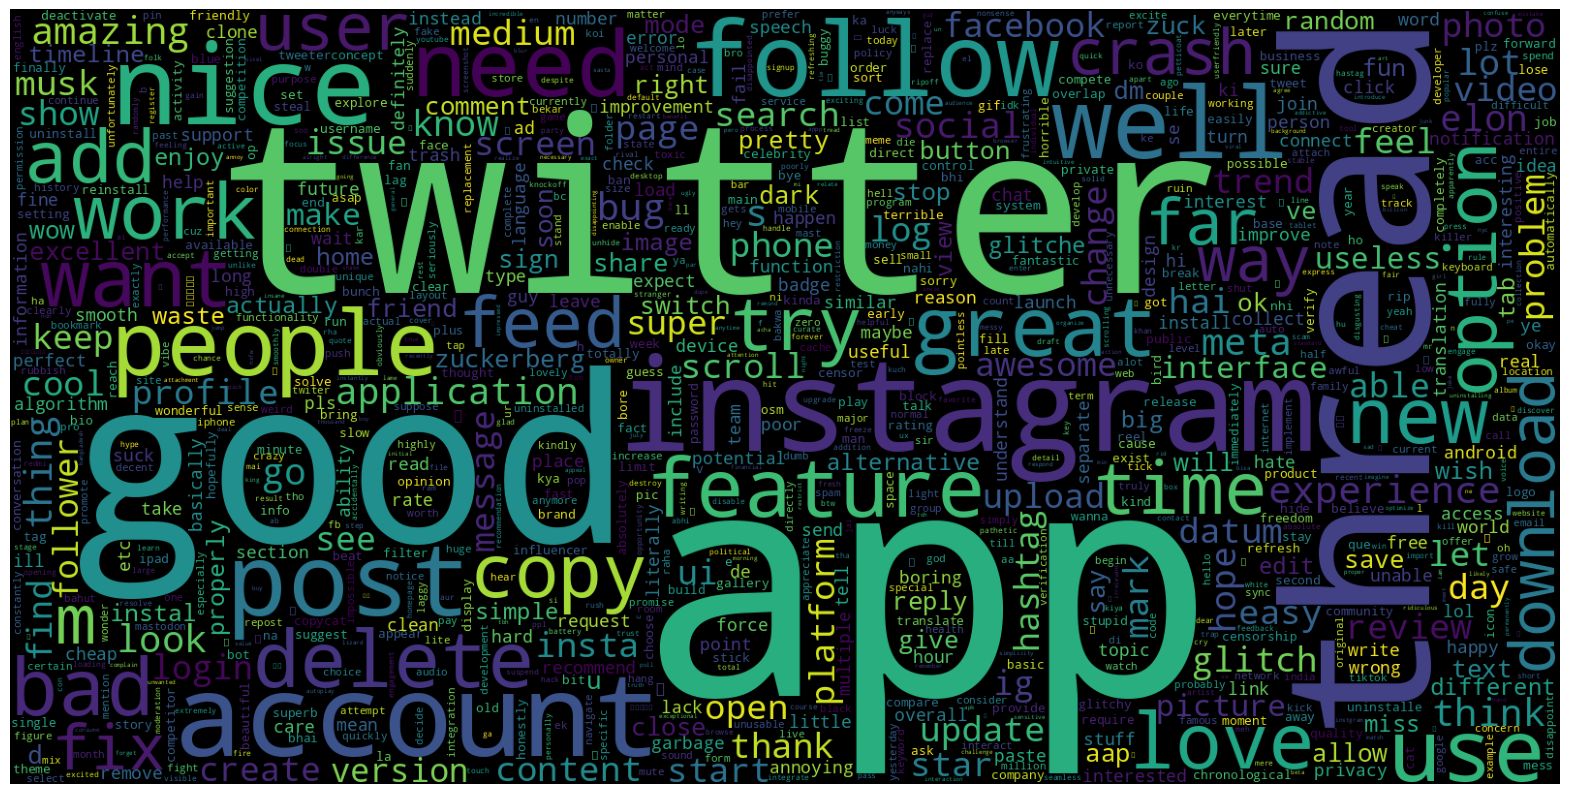

In [122]:
from wordcloud import WordCloud
data = df_new.review_description
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

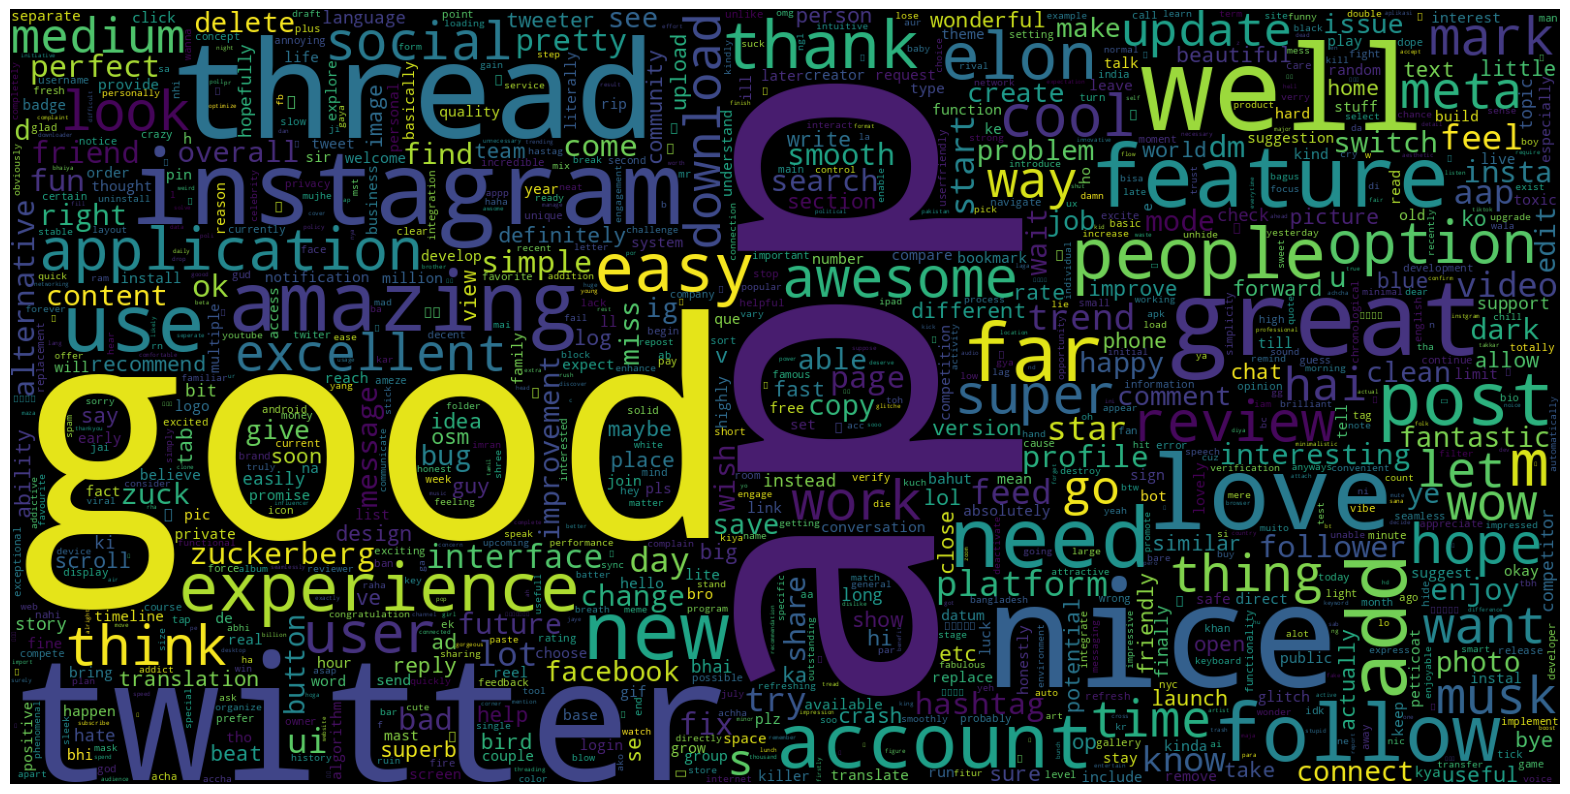

In [124]:
from wordcloud import WordCloud
data = df_new[df_new['rating'] == 1]['review_description']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [125]:
#term frequency
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
tf1=TfidfVectorizer()
data_vec=tf1.fit_transform(df_new['review_description'])

In [127]:
data_vec

<32909x17434 sparse matrix of type '<class 'numpy.float64'>'
	with 183457 stored elements in Compressed Sparse Row format>

In [128]:
y=df_new['rating'].values

In [129]:
y

array([-1,  0,  0, ..., -1, -1, -1])

In [130]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,stratify = y, random_state=42)

In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [135]:
sv = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()

models = [sv, dt, rf, ad]

accuracies = []

for model in models:
    print('Results for the model:', model.__class__.__name__)
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    report = classification_report(y_test, y_pred)
    print('Classification Report:\n', report)

    print('\n')

    accuracies.append(accuracy)

print('List of Accuracies:', accuracies)

Accuracy: 0.7560012154360377
Confusion Matrix:
 [[1707  101  496]
 [ 209   58  250]
 [ 265  285 3211]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.78      0.74      0.76      2304
           0       0.13      0.11      0.12       517
           1       0.81      0.85      0.83      3761

    accuracy                           0.76      6582
   macro avg       0.57      0.57      0.57      6582
weighted avg       0.75      0.76      0.75      6582



Results for the model: DecisionTreeClassifier
Accuracy: 0.7026739592828928
Confusion Matrix:
 [[1464  247  593]
 [ 172  126  219]
 [ 443  283 3035]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.70      0.64      0.67      2304
           0       0.19      0.24      0.21       517
           1       0.79      0.81      0.80      3761

    accuracy                           0.70      6582
   macro avg       0.56      0.56      0.56  

In [136]:
model_names = ['SVC', 'DecisionTree', 'RandomForest', 'AdaBoost']
fig = go.Figure(data=go.Bar(x=model_names, y=accuracies))
fig.update_layout(title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis_tickformat='.2%',
                  yaxis_range=[0, 1],
                  xaxis_tickangle=0)
fig.show()